<a href="https://colab.research.google.com/github/LucasBezerraSantos/Alura_Machine_Learning/blob/master/Dados_Multidimensionais_Machine_Learning_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lidando com dados de alta dimencionalidade
----
Lucas Bezerra - Machine Learning

## Etapa I

Nesse projeto serão analisados quais exames médicos são mais eficiêntes para classificar um câncer como Benigno ou Maligno.

### Leitura dos dados

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Conjuntos_de_Dados/ML_Alura/Dados_alta_dimensionalidade.csv')

In [ ]:
pd.set_option('display.max_columns', 35)
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
exames = dados.drop( ['exame_33', 'diagnostico','id'], axis=1)


diagnostico = dados.diagnostico.map({'M':1,'B':0})

### Aplicação de Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.dummy import DummyClassifier
import numpy as np

**Definição RandomForest**

In [ ]:
rd_forest = RandomForestClassifier(max_samples=100)
SEED = 438
np.random.seed(SEED)

**Definição Dummy**

In [ ]:
dummy = DummyClassifier(strategy= 'most_frequent', random_state=SEED)

**Train e Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( exames, diagnostico, test_size=0.30, random_state=SEED)

rd_forest.fit(X_train, y_train)
previsao_rd = rd_forest.predict(X_test)

### Resultados

**Baseline**

In [ ]:
dummy.fit(X_train, y_train)
Resultado_Dummy = dummy.score(X_test, y_test) *100

print(f'o Resultado Dummy foi: {Resultado_Dummy:.4f} %')

o Resultado Dummy foi: 60.8187 %


**Resultado RandonForest**

In [ ]:
print(f'A acurácia foi: {accuracy_score(y_test, previsao_rd)*100:.4f} %\n')
print(f'A precisao foi: {precision_score(y_test, previsao_rd)*100:.4f} %\n')
print(f'A revocação foi:{recall_score(y_test, previsao_rd)*100:.4} %\n')
print(f'o F1-Score foi: {f1_score(y_test, previsao_rd)*100:.4f} %')

A acurácia foi: 95.3216 %

A precisao foi: 94.0299 %

A revocação foi:94.03 %

o F1-Score foi: 94.0299 %


## Etapa II

### Visualização

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Para arrumar a escala do gráfico**

In [ ]:
scaler = StandardScaler()

scaler.fit(exames)
valores_exames_v2 = scaler.transform(exames)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns=exames.keys())

**Função para configurar e mostrar gráfico violino**

In [ ]:
def grafico_violino(valores):
    
    dados_plot = pd.concat([diagnostico, valores],axis = 1)

    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                      var_name="exames",
                      value_name='valores')
    
    plt.figure(figsize=(10, 10), dpi=100)
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    
    plt.xticks(rotation = 90)

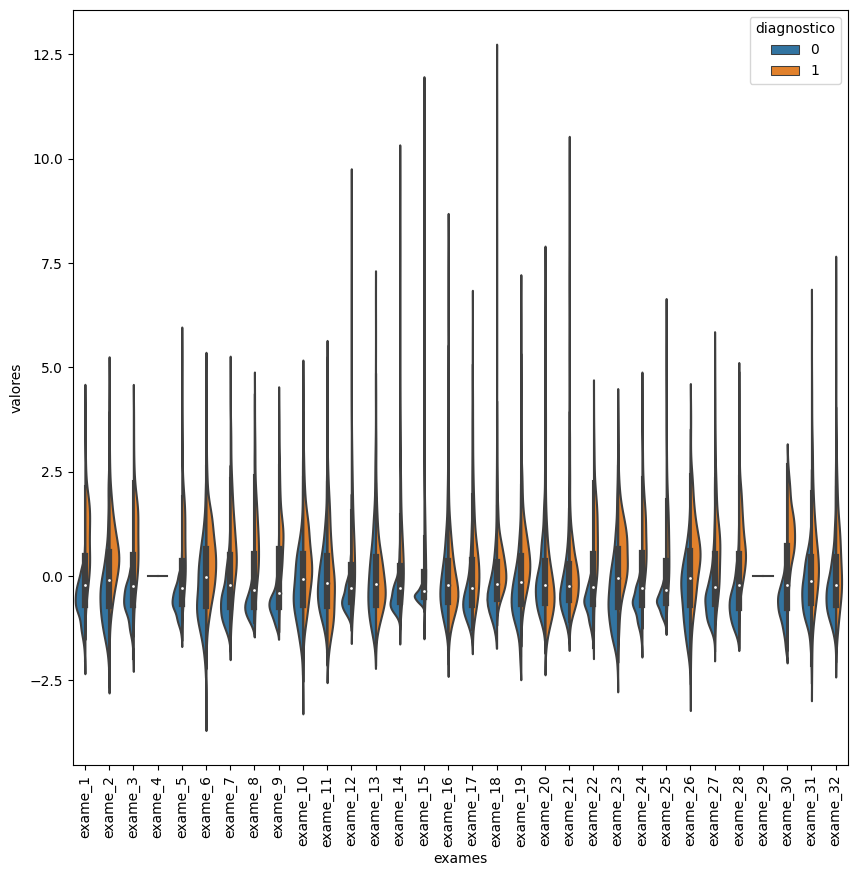

In [ ]:
grafico_violino(valores_exames_v2)

**Colunas sem ganho de informação excluidas**

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

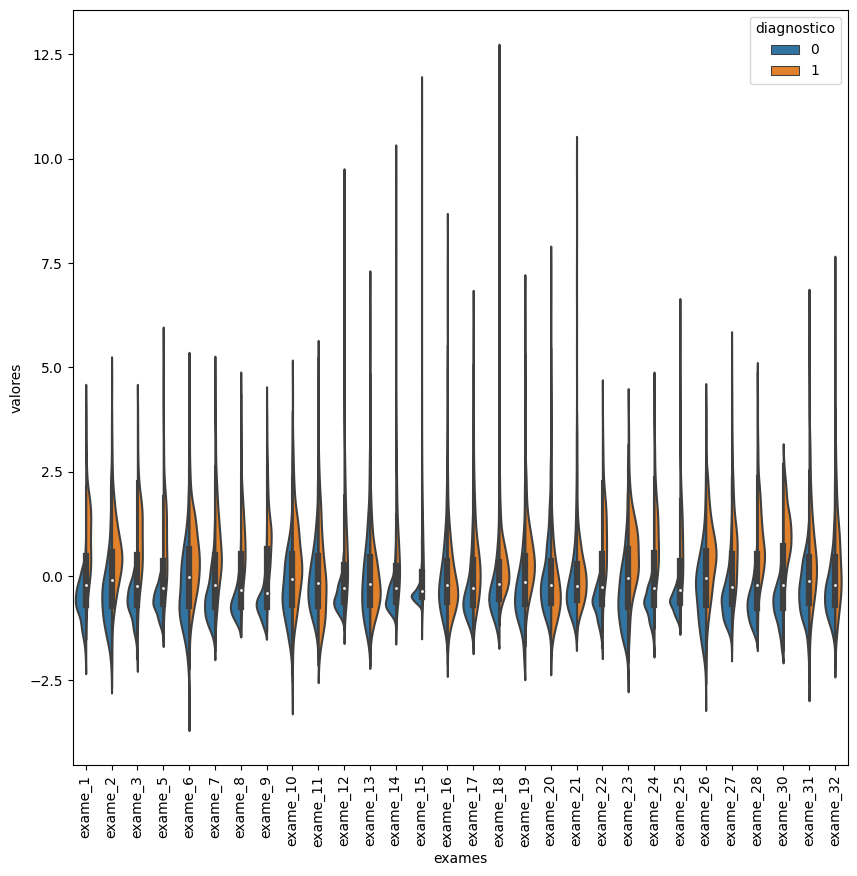

In [ ]:
grafico_violino(valores_exames_v3)

### Resultado

**Análise de resultados após redução de dimencionalidade**

In [ ]:
def classificar(valores):
    SEED = 438
    np.random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(X_train, y_train)

    print("Resultado da classificação %.2f%%" %(classificador.score(X_test, y_test)*100))

In [ ]:
classificar(valores_exames_v3)

Resultado da classificação 97.08%


### Análise de Correlação Manual

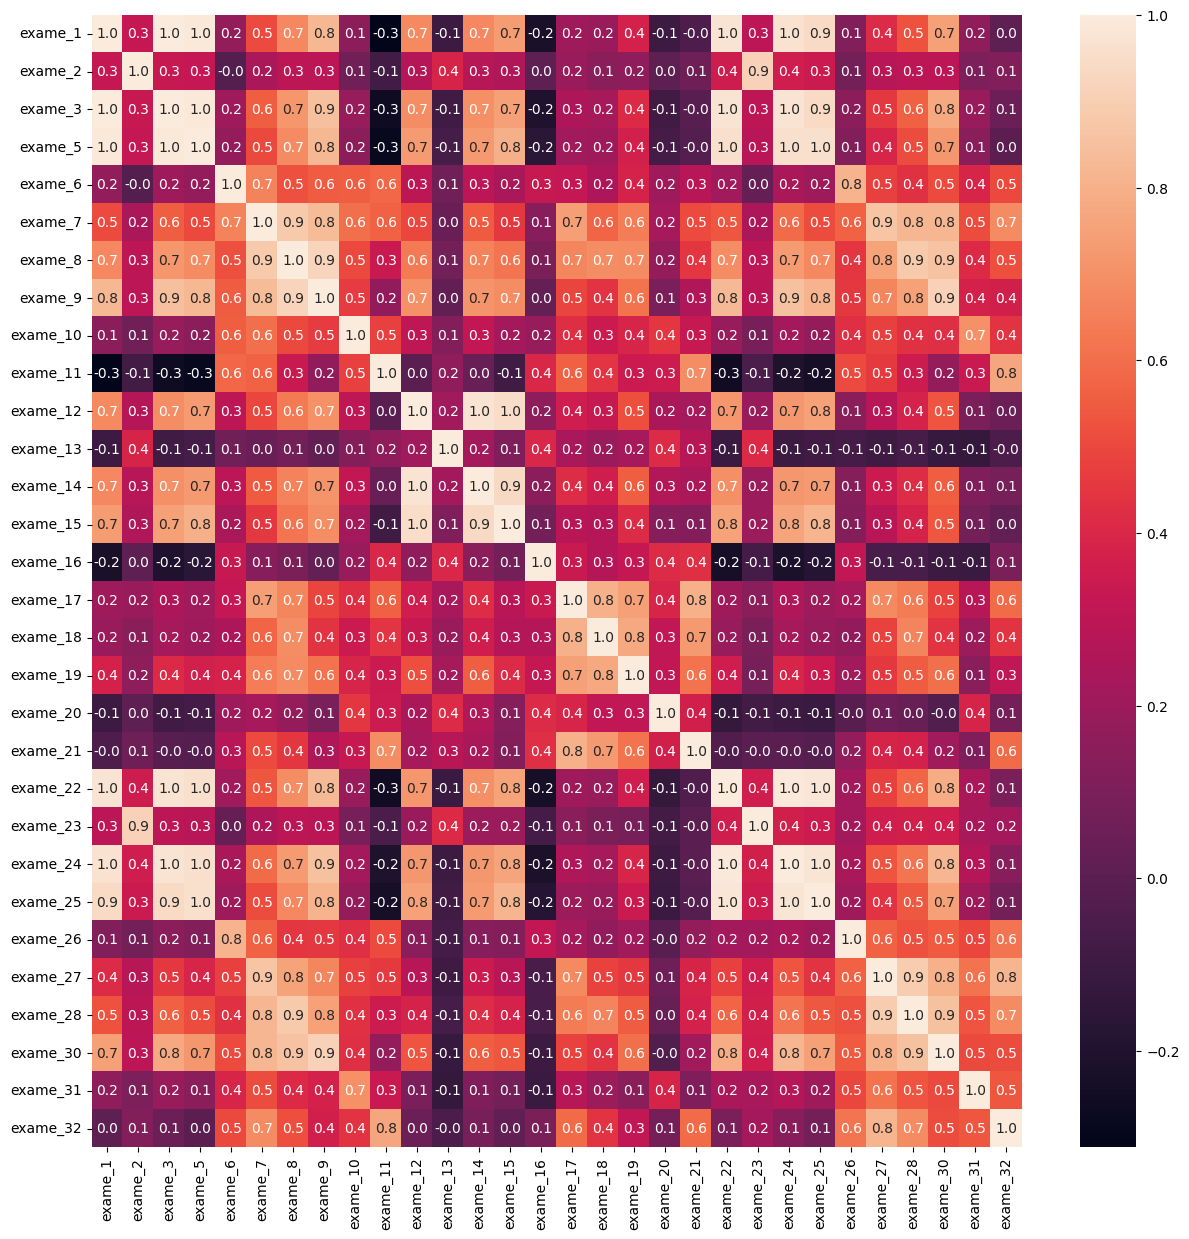

In [ ]:
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(valores_exames_v3.corr(), annot=True, fmt='.1f')

In [ ]:
matriz_correlacao = valores_exames_v3.corr()

In [ ]:
matriz_correlacao = (matriz_correlacao[matriz_correlacao > 0.99]).sum()

In [ ]:
variaveis_correlacionadas = matriz_correlacao[matriz_correlacao > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
dados_reduzidos = valores_exames_v3.drop(columns= ['exame_3', 'exame_24'], axis=1)

In [ ]:
classificar(dados_reduzidos)

Resultado da classificação 98.25%


### Análise de Correlação Automática

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
k_best = SelectKBest(chi2, k=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( exames, diagnostico, test_size=0.30, random_state=SEED)

k_best.fit(X_train, y_train)
train_kbest = k_best.transform(X_train)
test_kbest = k_best.transform(X_test)

### Resultado K_best

In [ ]:
randon_model = RandomForestClassifier(n_estimators = 100)
randon_model.fit(train_kbest, y_train)
previsao = randon_model.predict(test_kbest)

print(f'A acurácia foi: {accuracy_score(y_test, previsao)*100:.4f} %\n')
print(f'A precisao foi: {precision_score(y_test, previsao)*100:.4f} %\n')
print(f'A revocação foi:{recall_score(y_test, previsao)*100:.4} %\n')
print(f'o F1-Score foi: {f1_score(y_test, previsao)*100:.4f} %')

A acurácia foi: 94.1520 %

A precisao foi: 93.8462 %

A revocação foi:91.04 %

o F1-Score foi: 92.4242 %


**Matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
m_confusion_k = confusion_matrix(y_test, previsao)

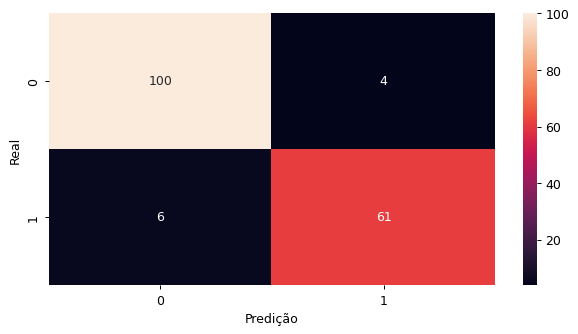

In [ ]:
set()
plt.figure(figsize=(8,4), dpi=90)
sns.heatmap(m_confusion_k, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')
plt.show()

### RFE - Seleção de Variáveis

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( exames, diagnostico, test_size=0.30, random_state=SEED)

randon_RFE = RandomForestClassifier(n_estimators = 100)
kbest_RFE = RFE(randon_RFE, n_features_to_select=5, step=1)  #configuração RFE

kbest_RFE.fit(X_train, y_train)                              #Treino RFE
train_RFE = kbest_RFE.transform(X_train)
test_RFE = kbest_RFE.transform(X_test)


In [ ]:
randon_RFE.fit(train_RFE, y_train)
previsao_rfe = randon_RFE.predict(test_RFE)

print(f'A acurácia foi: {accuracy_score(y_test, previsao_rfe)*100:.4f} %\n')
print(f'A precisao foi: {precision_score(y_test, previsao_rfe)*100:.4f} %\n')
print(f'A revocação foi:{recall_score(y_test, previsao_rfe)*100:.4} %\n')
print(f'o F1-Score foi: {f1_score(y_test, previsao_rfe)*100:.4f} %')

A acurácia foi: 94.1520 %

A precisao foi: 92.5373 %

A revocação foi:92.54 %

o F1-Score foi: 92.5373 %


**Matriz de confusão**

In [ ]:
m_confusion_r = confusion_matrix(y_test, previsao_rfe)

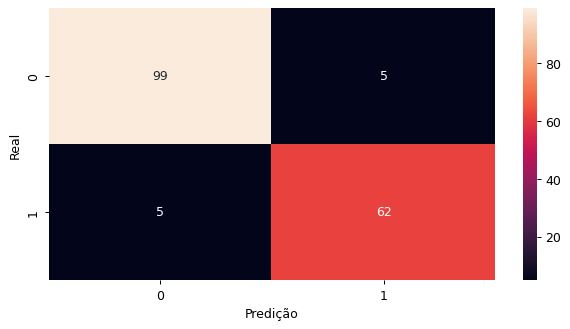

In [ ]:
set()
plt.figure(figsize=(8,4), dpi=90)
sns.heatmap(m_confusion_r, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')
plt.show()

### RFE - CROSS VALIDATION

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( exames, diagnostico, test_size=0.30, random_state=SEED)

randon_RFEVC = RandomForestClassifier(n_estimators = 100)
kbest_RFEVC = RFECV(randon_RFEVC, cv=5, step=1, scoring='accuracy')  #configuração RFE

kbest_RFEVC.fit(X_train, y_train)                              #Treino RFE
train_RFEVC = kbest_RFEVC.transform(X_train)
test_RFEVC = kbest_RFEVC.transform(X_test)

In [ ]:
randon_RFEVC.fit(train_RFEVC, y_train)
previsao_rfevc = randon_RFEVC.predict(test_RFEVC)

print(f'A acurácia foi: {accuracy_score(y_test, previsao_rfevc)*100:.4f} %\n')
print(f'A precisao foi: {precision_score(y_test, previsao_rfevc)*100:.4f} %\n')
print(f'A revocação foi:{recall_score(y_test, previsao_rfevc)*100:.4} %\n')
print(f'o F1-Score foi: {f1_score(y_test, previsao_rfevc)*100:.4f} %')

A acurácia foi: 96.4912 %

A precisao foi: 95.5224 %

A revocação foi:95.52 %

o F1-Score foi: 95.5224 %


**Matriz de confusão**

In [ ]:
m_confusion_rvc = confusion_matrix(y_test, previsao_rfevc)

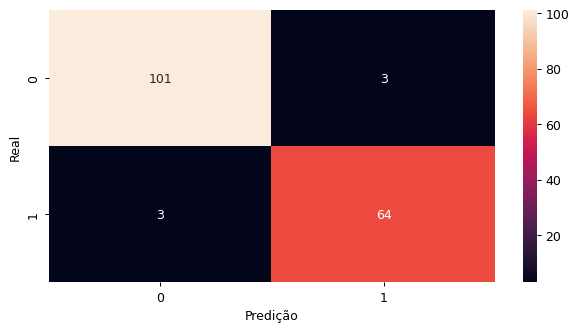

In [ ]:
set()
plt.figure(figsize=(8,4), dpi=90)
sns.heatmap(m_confusion_rvc, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')
plt.show()

In [ ]:
exames.columns[kbest_RFEVC.support_]

Index(['exame_1', 'exame_3', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

### PCA e TSNE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

**PCA**

In [ ]:
scaler = StandardScaler()
new_exames = scaler.fit_transform(exames)

In [ ]:
pca = PCA(n_components = 2)
val_pca = pca.fit_transform(new_exames)

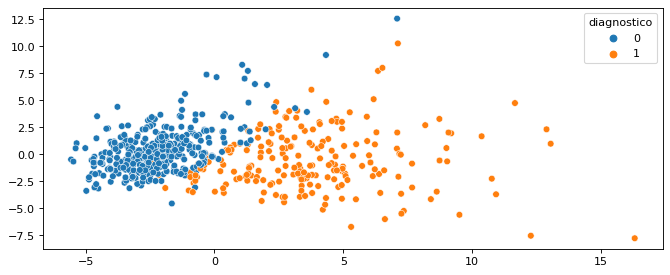

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
sns.scatterplot(x= val_pca[:,0], y= val_pca[:,1], hue= diagnostico )
plt.show()

**TSNE**

In [ ]:
tsne = TSNE(n_components = 2)
val_tsne = tsne.fit_transform(new_exames)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


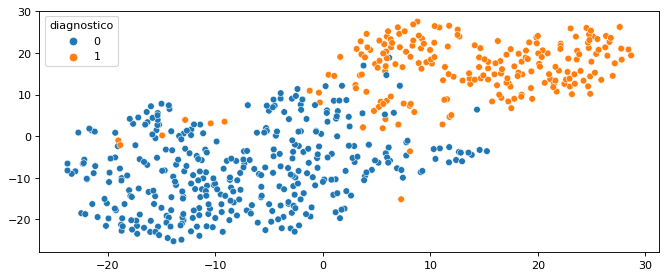

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
sns.scatterplot(x= val_tsne[:,0], y= val_tsne[:,1], hue= diagnostico )
plt.show()